In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import sys


/home/bk_anupam/anaconda3/envs/fastai/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/bk_anupam/anaconda3/envs/fastai/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [23]:
df_train = pd.read_excel("./output/df_train.xlsx", "df_train")

In [6]:
df_train_fold0_target1 = pd.read_excel("./output/df_train.xlsx", "df_train_fold0")

In [29]:
df_train_fold0_target1.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target,kfold,Pred
count,3146.000000,3146.000000,3146.000000,3146.000000,3146.00000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,...,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.0,3146.0,3146.000000
mean,1.088048,16.113160,1.487921,9167.816910,0.92562,3.911316,130.374984,1.320089,18.671329,23.007629,...,9.193579,3.870947,11.325908,0.103306,11.243102,1.207057,-0.123388,1.0,0.0,1.121742
std,0.411523,16.785675,1.057946,1262.168105,0.26243,9.733920,10.467343,4.501357,15.206079,14.827614,...,2.827590,1.768799,2.833076,0.523358,2.649380,1.414299,2.236190,0.0,0.0,0.616770
min,1.000000,1.000000,1.000000,33.000000,0.00000,1.000000,100.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,1.0,0.0,0.000000
25%,1.000000,1.000000,1.000000,9119.000000,1.00000,1.000000,123.000000,1.000000,1.000000,4.000000,...,8.000000,3.000000,11.000000,0.000000,9.400000,0.300000,-1.700000,1.0,0.0,1.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.00000,1.000000,130.000000,1.000000,19.000000,19.000000,...,9.000000,4.000000,11.800000,0.000000,10.800000,1.400000,0.320000,1.0,0.0,1.000000
75%,1.000000,39.000000,1.000000,9670.000000,1.00000,1.000000,136.000000,1.000000,37.000000,37.000000,...,11.000000,5.000000,12.571429,0.000000,12.700000,2.600000,1.740000,1.0,0.0,2.000000
max,6.000000,53.000000,6.000000,9991.000000,1.00000,42.000000,190.000000,109.000000,42.000000,41.000000,...,25.000000,14.000000,17.000000,8.000000,16.200000,3.700000,3.510000,1.0,0.0,2.000000


In [24]:
df_train.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target,kfold
count,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,...,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000,80942.000000
mean,1.115577,16.197326,1.648971,8993.380668,0.913975,3.708989,132.391585,1.261941,19.822564,23.362235,...,5.949742,7.279768,4.030627,9.659104,0.067246,11.522844,1.228208,-0.076391,1.145462,1.999963
std,0.452426,16.737628,1.234530,1818.900599,0.280402,8.720782,11.126395,3.675890,15.410691,14.946722,...,1.664669,3.533806,2.788397,5.529912,0.483030,2.653953,1.397932,2.252464,0.885700,1.414227
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,3.000000,...,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000,0.000000,1.000000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,6.000000,8.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000,1.000000,2.000000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,6.000000,9.000000,6.000000,13.250000,0.000000,12.700000,2.600000,1.790000,2.000000,3.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000,4.000000


In [25]:
def plot_feature_target_corr(df, feature_cols, target_col):
    fig, ax = plt.subplots(figsize=(14, 8))
    df = df[feature_cols + [target_col]]
    corr = df.corr()
    target_feature_interaction = corr[target_col].sort_values(ascending=False)
    labels = target_feature_interaction.index.to_list()
    labels.remove(target_col)
    values = target_feature_interaction.values.tolist()
    values.pop(0)
    ax.set_title("Feature target correlation")
    ax.set_xlabel(f"{target_col} correlation")
    ax.set_ylabel("Features")
    ax = sns.barplot(x=values, y=labels, ax=ax, palette="hls")

In [26]:
COLS_TO_LEAVE = ["id", "Target", "kfold"]
target_col = 'Target'
cont_features = df_train.dtypes[df_train.dtypes == "float"].index.values.tolist()
int_features = df_train.dtypes[df_train.dtypes == "int"].index.values.tolist()
cat_features = ['Marital_status', 'Application_mode', 
       'Course', 'Daytime_evening_attendance', 'Previous_qualification',
       'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
       'Mothers_occupation', 'Fathers_occupation', 'Displaced',
       'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'International']
all_features = [x for x in df_train.columns if x not in COLS_TO_LEAVE]

In [35]:
cont_features

['Previous_qualification_grade',
 'Admission_grade',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_2nd_sem_grade',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [53]:
df_train.Previous_qualification_grade.describe()

count    80942.000000
mean       132.391585
std         11.126395
min         95.000000
25%        125.000000
50%        133.100000
75%        140.000000
max        190.000000
Name: Previous_qualification_grade, dtype: float64

In [67]:
df_train_fold0_target1[df_train_fold0_target1.Pred==1].Curricular_units_1st_sem_grade.describe()

count    1903.000000
mean       11.667327
std         1.515653
min         0.000000
25%        11.000000
50%        11.800000
75%        12.333333
max        18.000000
Name: Curricular_units_1st_sem_grade, dtype: float64

In [66]:
df_train_fold0_target1[df_train_fold0_target1.Pred==0].Curricular_units_1st_sem_grade.describe()

count    430.000000
mean       8.113603
std        5.603217
min        0.000000
25%        0.000000
50%       11.291667
75%       12.000000
max       17.000000
Name: Curricular_units_1st_sem_grade, dtype: float64

In [70]:
df_train_fold0_target1[df_train_fold0_target1.Pred==2].Curricular_units_2nd_sem_grade.value_counts()

Curricular_units_2nd_sem_grade
12.000000    50
13.000000    48
12.200000    34
11.000000    33
11.600000    30
             ..
14.062500     1
12.222222     1
12.411429     1
13.423750     1
13.976667     1
Name: count, Length: 202, dtype: int64

In [72]:
df_train_fold0_target1[df_train_fold0_target1.Pred==1].Curricular_units_1st_sem_grade.value_counts()

Curricular_units_1st_sem_grade
12.000000    268
11.000000    186
11.500000    102
10.000000     93
13.000000     71
            ... 
13.142857      1
12.153846      1
11.615385      1
13.071429      1
15.333333      1
Name: count, Length: 137, dtype: int64

In [71]:
df_train_fold0_target1[df_train_fold0_target1.Pred==0].Curricular_units_1st_sem_grade.value_counts()

Curricular_units_1st_sem_grade
0.000000     136
12.000000     39
11.000000     26
10.000000     23
11.500000     22
            ... 
16.500000      1
13.800000      1
8.000000       1
11.714286      1
13.980000      1
Name: count, Length: 63, dtype: int64

In [57]:
def plot_kde_target(df, cols_float, fig_size):
    # plot the distribution of numerical features . Also check if train and  test data have roughly 
    # the same distribution for numerical features
    n_features = len(cols_float)
    n_rows = (n_features + 1) // 2  # Integer division for ceiling    
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=fig_size, dpi=100)    
    fig.suptitle('Distribution of continuous features by target', fontsize=12)
    plt.subplots_adjust(hspace=0.3)
    # Loop through features and create subplots
    for i, col_name in enumerate(cols_float):
        row = i // 2
        col = i % 2        
        sns.kdeplot(data=df, x=col_name, hue="Pred", fill=True, ax=axes[row, col])                
        axes[row, col].set_ylabel("density")
        axes[row, col].set_xlabel(col_name)                
    # Remove extra subplots if the number of features is odd
    if n_features % 2 == 0:
        fig.delaxes(axes[-1, -1])  # Delete the last subplot if there's an empty one
    fig.tight_layout()
    plt.show()  

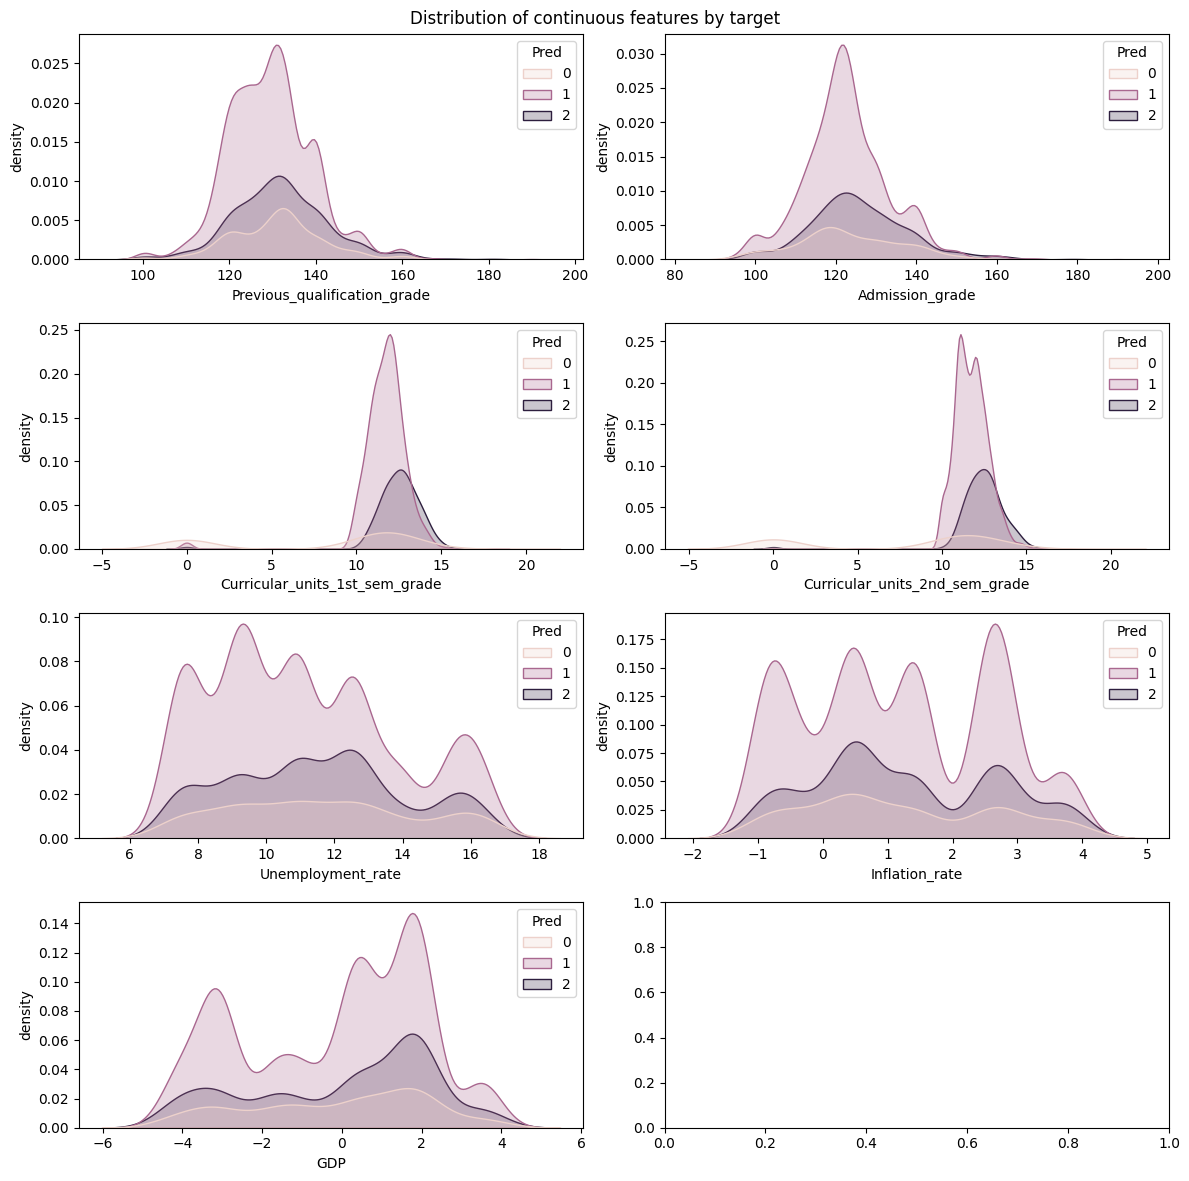

In [58]:
plot_kde_target(df_train_fold0_target1, cont_features, fig_size=(12, 12))

In [63]:
def plot_box_plots(df, cols_float, fig_size):
    df1_0 = df[df.Pred == 0]
    df1_1 = df[df.Pred == 1]
    df1_2 = df[df.Pred == 2]
    n_rows = len(cols_float)
    n_cols = 3
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=fig_size, dpi=100)    
    plt.subplots_adjust(hspace=0.3)
    for row in range(n_rows):
        col = 0
        col_name = cols_float[row]
        sns.boxplot(x=df1_1[col_name], orient='v', color='skyblue', ax=axes[row, col])
        axes[row, 0].set_ylabel("")
        axes[row, 0].set_xlabel(col_name)
        axes[row, 0].set_title(f'Pred 1', fontsize=12)
        col=1
        sns.boxplot(x=df1_1[col_name], orient='v', color='orange', ax=axes[row, col])
        axes[row, 1].set_ylabel("")
        axes[row, 1].set_xlabel(col_name)
        axes[row, 1].set_title(f'Pred 2', fontsize=12)
        col=2
        sns.boxplot(x=df1_0[col_name], orient='v', color='green', ax=axes[row, col])
        axes[row, 2].set_ylabel("")
        axes[row, 2].set_xlabel(col_name)
        axes[row, 2].set_title(f'Pred 0', fontsize=12)
    fig.tight_layout()
    plt.show()   

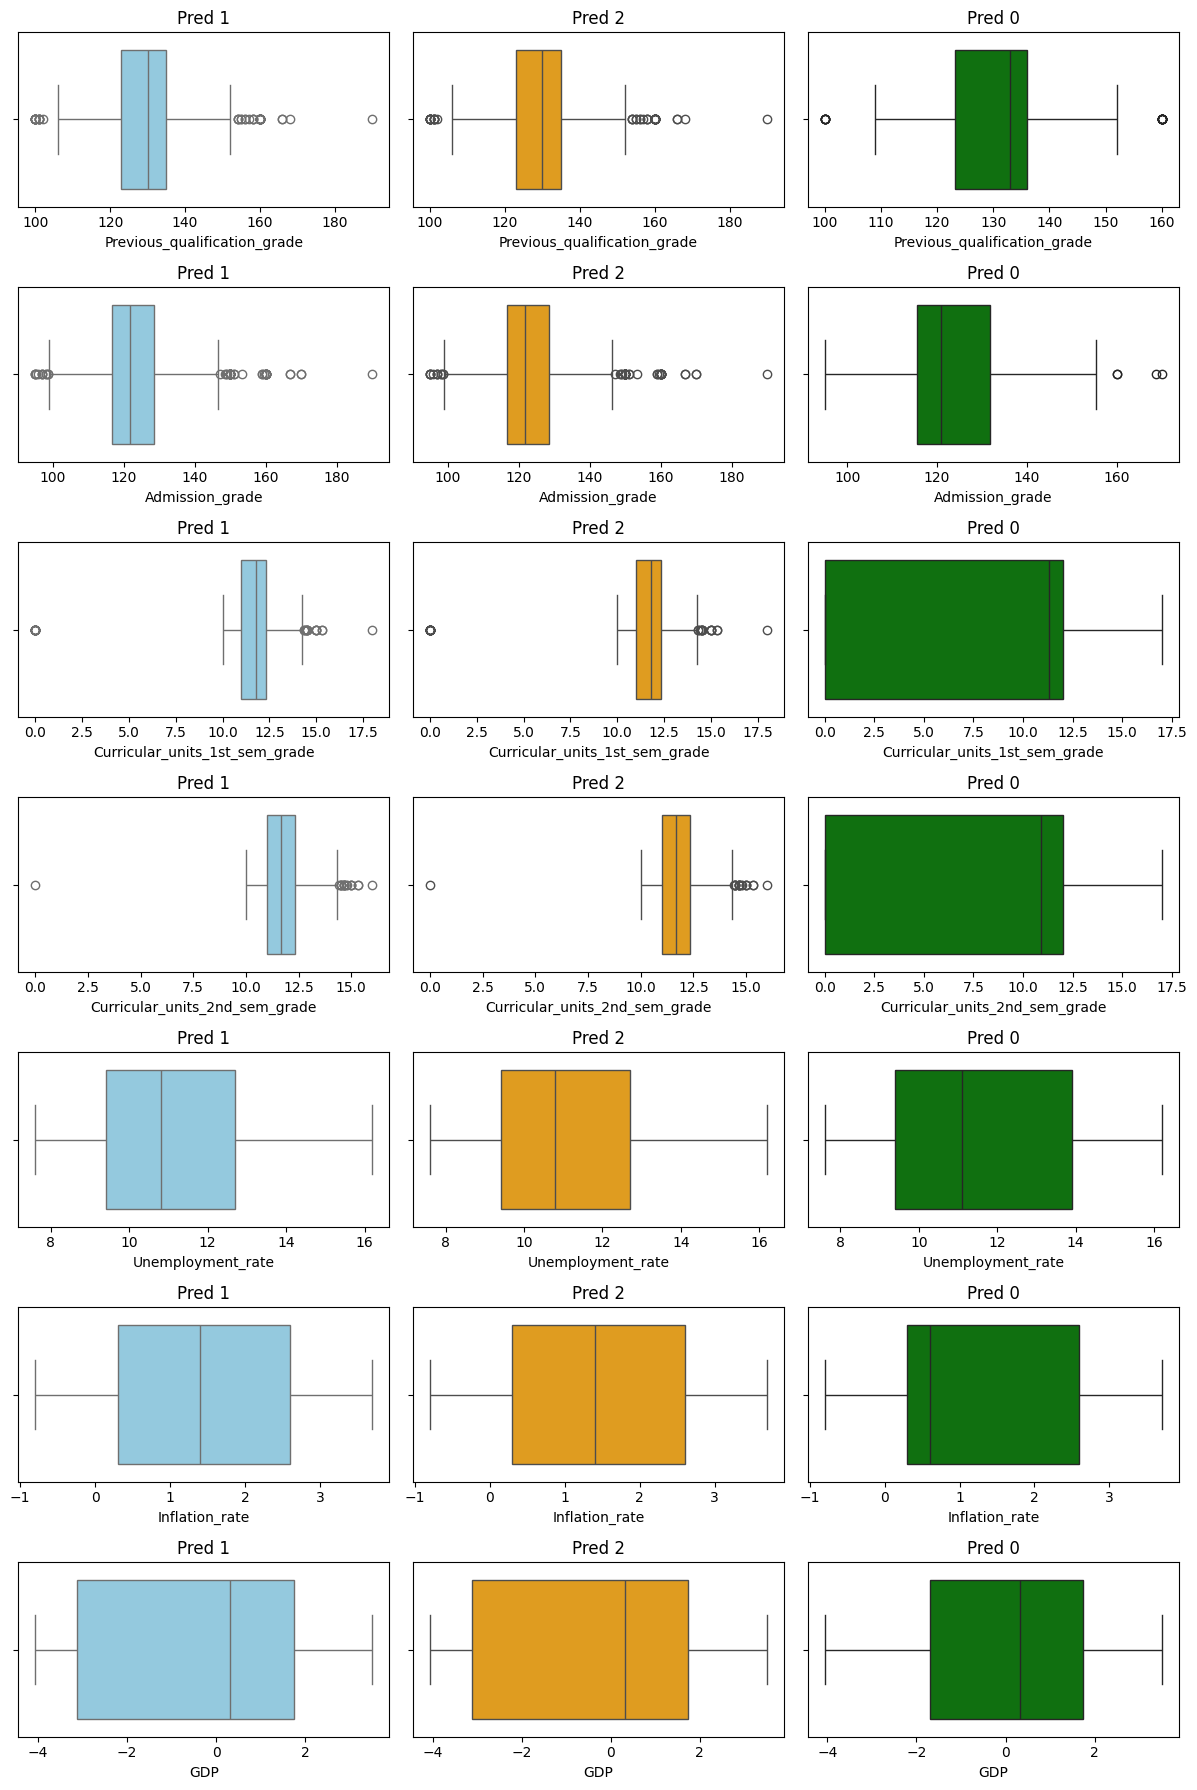

In [64]:
import warnings
warnings.filterwarnings('ignore')

plot_box_plots(df_train_fold0_target1, cont_features, fig_size=(12,18))